<a href="https://colab.research.google.com/github/claraaqn/Calculo-Numerico/blob/main/Atividade%2002%20Comparativo%20dos%20M%C3%A9todos%20de%20Zeros%20de%20Fun%C3%A7%C3%B5es%20Reais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 02 - Zeros de Funções Reais

Nome completo: Mª Clara Aquino S. Souza


# Introdução

O presente trabalho apresenta o relatório da implementação computacional de diferentes técnicas numéricas estudadas na disciplina de Cálculo Numérico, lecionada às turmas de engenharia da Unidade Acadêmica de Belo Jardim. Utiliza-se a linguagem Python para a implementação dos algoritmos e considera-se a função

$$f(x) = e^x -  2x - 2$$

In [ ]:
import math as m

# minha função definida aqui
def f(x):
    return m.pow(m.e,x) - 2*x - 2

# Estudo do sinal da função

A função $f(x) = e^x -  2x - 2$ possui pelo menos uma zero no intervalo $(-0.8,-0,7)$ uma vez que $f(-0.8) = 0,04933 $, $f(-0.7) = -0,10341$, de modo que a função troca de sinal no intervalo considerado.

Calulando-se a derivada da função obtem-se

$$f'(x) = e^x -2$$

Verifica-se que $f'(x) < 0$ para todo $x\in(-0.8,-0,7)$. Portanto, como a derivada não troca de sinal em $(-0.8,-0,7)$, existe um único zero para $f(x)$ neste intervalo.

O intervalo $(-0.8,-0,7)$ será utilizada para todos os métodos numéricos a serem implementados, a fim de comparação de eficiência entre os métodos.



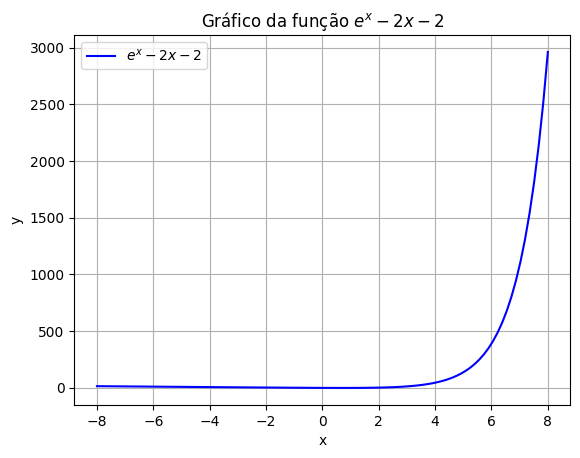

In [ ]:
# Gráfico da função
import matplotlib.pyplot as plt
import numpy as np

# Criando um intervalo de valores para x
x = np.linspace(-8, 8, 100)

# Calculando os valores da função para cada valor de x
y = np.e**x - 2*x - 2

# Criando o gráfico
plt.plot(x, y, label=r'$e^x - 2x -2$', color='blue')
plt.title('Gráfico da função $e^x -  2x - 2$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# meu intervalo
a0 = -0.8
b0 = -0.7

Para todos os os métodos a serem implementados e comparados, será considerada a precisão $ɛ=0.00009$ de quatro casas decimais, como segue:

In [ ]:
# precisão
e = 0.00009

# Método da Bissecção

O método da bissecção consistem em dada uma $f(x)$ contínua no intervalo $[a,b]$ e $f(a)*f(b)<0$ é obtido a média entre a e b definida por $x_0$, criando dois subintervalos $[a,x_0]$ e $[x_0,b]$. Sabendo os dois subintervalos é feita a verificação de qual deles contém a raiz.
A raiz estará no subintervalor onde a função tem sinais opostos nos extremos, ou seja, se $f(a)*f(x_0)< 0$, então a raiz tá nesse intervalo e o b será atulizado para $x_0$, caso contrário o valor atualizado será o de $a$. O processo de média e verificação vai continuar até se achar a raiz dentro do erro desejado.


In [ ]:
#inicializa a contagem de interações
k=0
a = a0
b = b0

while (b-a)>e:
  M = (a+b)/2 # atualiza a média a cada noca interação

  # atualiza o valor de a ou b
  if f(a)*f(M)<0:
    b=M
  else:
    a=M

  # faz a contagem da interação
  k += 1

print(f'A solução encontrada foi {M} em {k} interações')

A solução encontrada foi -0.768017578125 em 11 interações


# Método da Posição Falsa

O método da posição falsa consiste em aplicar a mesma ideia do método da bissecção, mas ao invés de se dividir o intervalo $[a, b]$ ao meio, ele é dividido em partes proporcionais, tal como nesse formula: $$M = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$


In [ ]:
a=a0
b=0

M = (a*f(b) - b*f(a))/(f(b) - f(a)) # primeira interação já ocorre aqui

#inicializa a contagem de interações
k = 1

while abs(f(M))>e:
  M = (a*f(b) - b*f(a))/(f(b) - f(a)) # atuliza a média ponderada

  # atualiza o valor de a ou b
  if f(a)*f(M)<0:
    b=M
  else:
    a=M

  # faz a contagem da interação
  k += 1

print(f'A solução encontrada foi {M} em {k} interações')

A solução encontrada foi -0.7680121350514645 em 3 interações


# Método do Ponto Fixo

O método do ponto fixo consiste em obter uma função de iteração $\phi(x)$ a partir de a equação $f(x) = 0$.

Supondo que a função de iteração é convergente, usa-se uma condição inicial $x_0\in(a,b)$ e executa a rotina
$$x_{k+1} = \phi(x_k)$$ até que $|f(x_k)|<ɛ$ onde $ɛ$ é a precisão inidicada.

Para verificar se a função de iteração é convergente, resolvemos a inequação modular
$$ |\phi'(x)| < 1$$
e verificamos a intersecção do intervalo obtido nesta inequação com o intervalo inicial $(0.7,1)$. A condição inicial $x_0$ deve estar nesta intersecção.

Para a função dada, obtemos um função de iteração
$$
\phi(x) = ln(2x+2)
$$
A inequação modular $|\phi'(x)| < 1$ produz

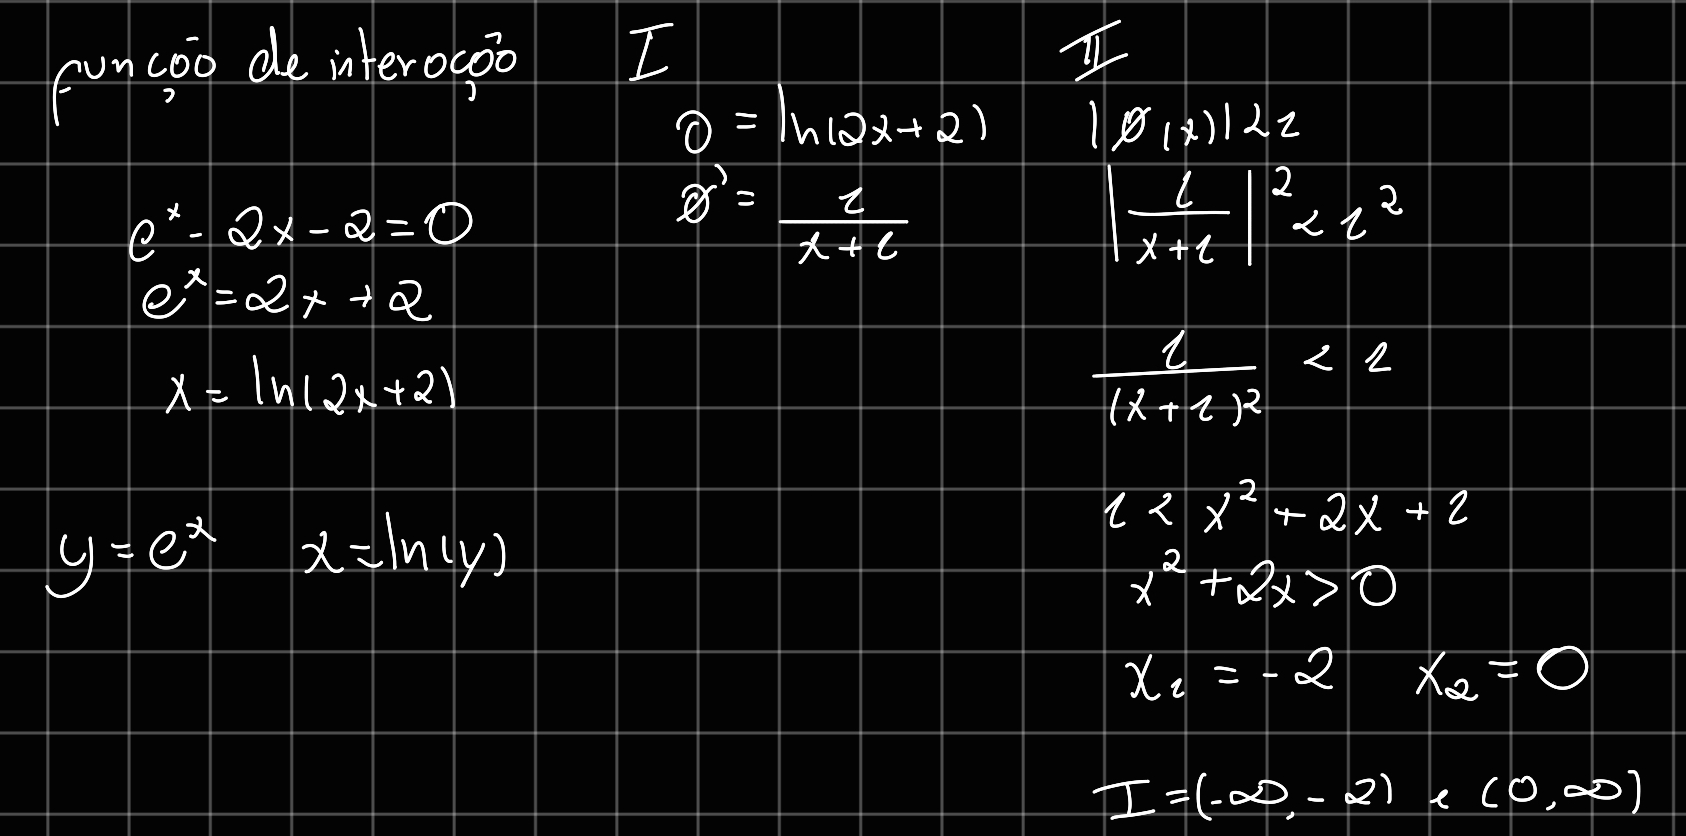

que resulta no intervalo:
$$I=[-\infty,-2] e [0,\infty]$$
Portanto, a função de iteração é diverge, pois a raiz -0,76801 não está dentro do intervalo encontrado.

In [ ]:
def phi(x):
  return np.log(2*x + 2)

In [ ]:
a0 = a
b0 = b

x0 = (a0+b0)/2 # condição inicial
x_k = x0

#inicializa a contagem de interações
interacao_max = 100

for k in range(1, interacao_max+1):
  x_k=phi(x_k)

  if abs(f(x_k))<e:
    break

print(f'A solução encontrada foi {x_k} em {k} interações')

A solução encontrada foi nan em 100 interações


<ipython-input-7-fd2c7206e075>:2: RuntimeWarning: invalid value encountered in log
  return np.log(2*x + 2)


# Método de Newton

O método de Newton é um caso especial do método do ponto fixo que consistem em usar a função de iteração
$$
\phi(x_k) = x_k - \dfrac{f(x_k)}{f'(x_k)}
$$
Este método é convergente se $f'(x) \neq 0$ e $f''(x)$ existir e for contínua em $(a,b)$. Verificando, obsevamos que
$$
f'(x) = e^x - 2
$$
Além disso,
$$
f''(x) = e^x
$$

In [ ]:
# derivada da função inicial
def f_linha(x):
  return m.pow(m.e,x) - 2


# função de interação
def phi(x):
  return x - f(x)/f_linha(x)

In [ ]:
x = -0.7 # condição inicial

#inicializa a contagem de interações
k = 0


while abs(f(x))>e:
  x = phi(x) # atualizando diretamente o x

  # faz a contagem da interação
  k += 1

print(f'A solução encontrada foi {x} em {k} interações')

A solução encontrada foi -0.7680391313279619 em 2 interações


# Método da Secante

O método da secante é uma discretização do Método de Newton e do Ponto Fixo.
Seja $f(x)$ um função contínua no intervalor $[x_0, x_1]$ e $f(x_0)*f(x_1) < 0$ existe uma raiz com sucessivas aproximacções de $x_2, x_3, x_4, ...$ que pode ser o obtida por uma fórmula.

Desta forma, as iterações são calculadas por
$$
x_{k+1} = \dfrac{x_{k-1}\cdot f(x_k) - x_k\cdot f(x_{k-1})}{f(x_k) - f(x_{k-1})}
$$

Assim, são necessárias duas condições iniciais em $(a,b)$

In [ ]:
# condições iniciais
x0 = -0.7
x1 = -0.8


x2 = (x0*f(x1) - x1*f(x0))/(f(x1) - f(x0)) # já conta como uma interação

#inicializa a contagem de interações
k = 1

while abs(f(x2))>e:
  x2 = (x0*f(x1) - x1*f(x0))/(f(x1) - f(x0)) # atualiza x2

  # atualizando x0 e x1
  x0 = x1
  x1 = x2

  # faz a contagem da interação
  k += 1

print(f'A solução encontrada foi {x2} em {k} interações')

A solução encontrada foi -0.7680374578995894 em 3 interações


# Resultados e Discussões

Dentre os resultados obtidos, verificou-se que o método de Método de Newton apresentou melhor eficiência com base no número de iterações como pode ser visto na tabela a seguir:


<table>
  <thead>
    <tr>
      <th>Método</th>
      <th>Raiz</th>
      <th>Número de Iterações</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Bissecção</td>
      <td>-0.76801</td>
      <td>11</td>
    </tr>
    <tr>
      <td>Ponto Falso</td>
      <td>-0.76801</td>
      <td>3</td>
    </tr>
    <tr>
      <td>Ponto Fixo</td>
      <td>-</td>
      <td>-</td>
    </tr>
    <tr>
      <td>Método de Newton</td>
      <td>-0.76803</td>
      <td>2</td>
    </tr>
    <tr>
      <td>Método da Secante</td>
      <td>-0.76803</td>
      <td>3</td>
    </tr>
  </tbody>
</table>

O método do ponto fixo apresentou divergência para a função de iteração obtida $\phi(x) = ln(2x+2)$. Não foram encontradas dificuldades analitícas no tratamento dos métodos.